# Problem Statement
Predicting Coupon Redemption
XYZ Credit Card company regularly helps it’s merchants understand their data better and take key business decisions accurately by providing machine learning and analytics consulting. ABC is an established Brick & Mortar retailer that frequently conducts marketing campaigns for its diverse product range. As a merchant of XYZ, they have sought XYZ to assist them in their discount marketing process using the power of machine learning. Can you wear the AmExpert hat and help out ABC?

 
Discount marketing and coupon usage are very widely used promotional techniques to attract new customers and to retain & reinforce loyalty of existing customers. The measurement of a consumer’s propensity towards coupon usage and the prediction of the redemption behaviour are crucial parameters in assessing the effectiveness of a marketing campaign.

 
ABC’s promotions are shared across various channels including email, notifications, etc. A number of these campaigns include coupon discounts that are offered for a specific product/range of products. The retailer would like the ability to predict whether customers redeem the coupons received across channels, which will enable the retailer’s marketing team to accurately design coupon construct, and develop more precise and targeted marketing strategies.

 
The data available in this problem contains the following information, including the details of a sample of campaigns and coupons used in previous campaigns -

User Demographic Details
Campaign and coupon Details
Product details
Previous transactions
Based on previous transaction & performance data from the last 18 campaigns, predict the probability for the next 10 campaigns in the test set for each coupon and customer combination, whether the customer will redeem the coupon or not?

# Dataset Shema

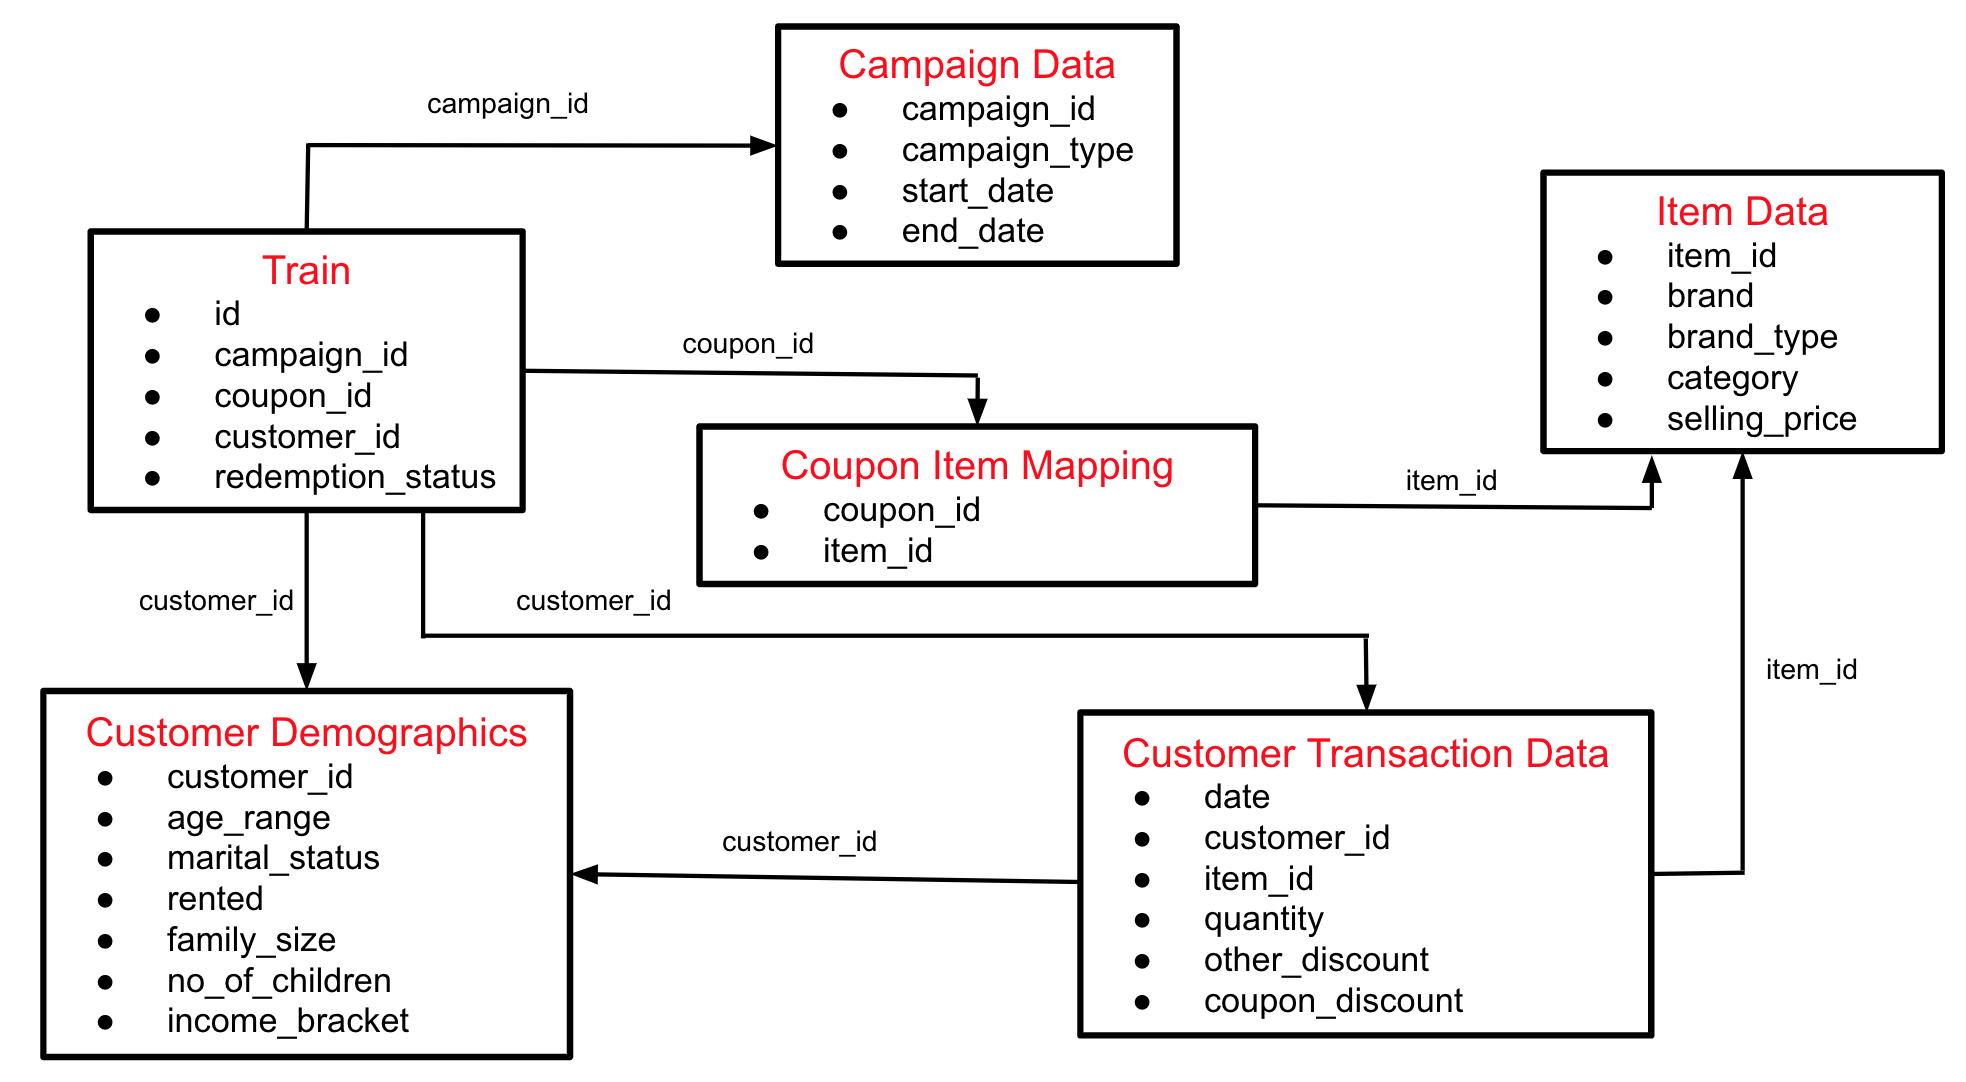

**Let us combine all the data and prepare the dataset first**

# Variable Definition Train - Master File
# train.csv: Train data containing the coupons offered to the given customers under the 18 campaigns<br>
ID(Impression Id)         -        Unique id for coupon customer impression <br>
campaign_id               -        Unique id for a discount campaign <br>
coupon_id                 -        Unique id for a discount coupon <br>
customer_id               -        Unique id for a customer <br>
redemption_status(target) -        (0 - Coupon not redeemed, 1 - Coupon redeemed) <br>

In [82]:
# Needed Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [83]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test_QyjYwdj.csv")
test.head()

,id,campaign_id,coupon_id,customer_id
0,3,22,869,967
1,4,20,389,1566
2,5,22,981,510
3,8,25,1069,361
4,10,17,498,811


In [84]:
print ("DataFrame Shape: "  + str(df.shape))
display(df.head())
# Let us Check Null in Train Data
print(df.info())
print ("Number of unique value in each column: ")
df.nunique()

DataFrame Shape: (78369, 5)


,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB
None
Number of unique value in each column: 


id                   78369
campaign_id             18
coupon_id              866
customer_id           1428
redemption_status        2
dtype: int64

**As Mentioned in desciption train data has 18 campaign Details.  First We Can Merge Campaign Data to the main dataframe 
because it has no further dependency**<br>
<br>
campaign_data.csv: Campaign information for each of the 28 campaigns(Train 18 + test 10)<br>
<br>
Variable	Definition<br>
campaign_id	- Unique id for a discount campaign<br>
campaign_type -	Anonymised Campaign Type (X/Y)<br>
start_date - Campaign Start Date<br>
end_date - Campaign End Date<br>

In [85]:
# Campaign Data
campaign_df = pd.read_csv("campaign_data.csv")
display(campaign_df.head())
# Merging Campaign Data into Master DF
df = pd.merge(df, campaign_df, on ="campaign_id", how="left")
display(df.head())
df.info()
test = pd.merge(test, campaign_df, on ="campaign_id", how="left")
display(test.head())
test.info()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 8 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null object
end_date             78369 non-null object
dtypes: int64(5), object(3)
memory usage: 5.4+ MB


,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date
0,3,22,869,967,X,16/09/13,18/10/13
1,4,20,389,1566,Y,07/09/13,16/11/13
2,5,22,981,510,X,16/09/13,18/10/13
3,8,25,1069,361,Y,21/10/13,22/11/13
4,10,17,498,811,Y,29/07/13,30/08/13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 7 columns):
id               50226 non-null int64
campaign_id      50226 non-null int64
coupon_id        50226 non-null int64
customer_id      50226 non-null int64
campaign_type    50226 non-null object
start_date       50226 non-null object
end_date         50226 non-null object
dtypes: int64(4), object(3)
memory usage: 3.1+ MB


In [86]:
df.columns = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status',
       'campaign_type', 'campaign_start_date', 'campaign_end_date']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 8 columns):
id                     78369 non-null int64
campaign_id            78369 non-null int64
coupon_id              78369 non-null int64
customer_id            78369 non-null int64
redemption_status      78369 non-null int64
campaign_type          78369 non-null object
campaign_start_date    78369 non-null object
campaign_end_date      78369 non-null object
dtypes: int64(5), object(3)
memory usage: 5.4+ MB


In [88]:
test.columns = ['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_type',
       'campaign_start_date', 'campaign_end_date']
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 7 columns):
id                     50226 non-null int64
campaign_id            50226 non-null int64
coupon_id              50226 non-null int64
customer_id            50226 non-null int64
campaign_type          50226 non-null object
campaign_start_date    50226 non-null object
campaign_end_date      50226 non-null object
dtypes: int64(4), object(3)
memory usage: 3.1+ MB


**Let us merge coupun item mapping dataframe with item dataframe**

# Coupun Item Mapping
<br>
coupon_item_mapping.csv: Mapping of coupon and items valid for discount under that coupon<br>
<br>
Variable	Definition<br>
coupon_id - Unique id for a discount coupon (no order)<br>
item_id	- Unique id for items for which given coupon is valid (no order)<br>

# item data
<br>
item_data.csv: Item information for each item sold by the retailer<br>
<br>
Variable	Definition<br>
item_id	- Unique id for item<br>
brand - Unique id for item brand<br>
brand_type - Brand Type (local/Established)<br>
category - Item Category<br>

In [89]:
coupon_item_df = pd.read_csv("coupon_item_mapping.csv")
display(coupon_item_df.head())
print(coupon_item_df.nunique())
print(coupon_item_df.info())

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


coupon_id     1116
item_id      36289
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB
None


In [90]:
item_df = pd.read_csv("item_data.csv")
display(item_df.head())
print(item_df.nunique())
print(item_df.info())

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


item_id       74066
brand          5528
brand_type        2
category         19
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB
None


In [91]:
coupon_item_mapping_data = pd.merge(coupon_item_df, item_df, on= "item_id", how="left")
display(coupon_item_mapping_data.head())
print(coupon_item_mapping_data.info())
print(coupon_item_mapping_data.nunique())

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 5 columns):
coupon_id     92663 non-null int64
item_id       92663 non-null int64
brand         92663 non-null int64
brand_type    92663 non-null object
category      92663 non-null object
dtypes: int64(3), object(2)
memory usage: 4.2+ MB
None
coupon_id      1116
item_id       36289
brand          2555
brand_type        2
category         17
dtype: int64


**Cannot merge df and coupon item data directly,  hence saving the File Now**

In [92]:
coupon_item_mapping_data.to_csv("coupon_item_mapping_data.csv", index=False)

# Customer Demographics can be directly merged into Master Dataframe.

In [93]:
CustomerDemographics = pd.read_csv("customer_demographics.csv")
display(CustomerDemographics.head())
print(CustomerDemographics.info())
print(CustomerDemographics.nunique())

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB
None
customer_id       760
age_range           6
marital_status      2
rented              2
family_size         5
no_of_children      3
income_bracket     12
dtype: int64


In [94]:
# Customer Information has null values.
CustomerDemographics['marital_status'].fillna("Unknown").value_counts()

Unknown    329
Married    317
Single     114
Name: marital_status, dtype: int64

In [95]:
CustomerDemographics['marital_status'][CustomerDemographics['family_size']=="1"].value_counts()

Single    65
Name: marital_status, dtype: int64

In [96]:
# If Family size is 1 mark every one as single
CustomerDemographics['marital_status'][(CustomerDemographics['family_size']=="1")&(CustomerDemographics['marital_status'].isnull())] = "Single"

In [97]:
CustomerDemographics['marital_status'].fillna("Unknown").value_counts()

Married    317
Single     297
Unknown    146
Name: marital_status, dtype: int64

In [98]:
CustomerDemographics[CustomerDemographics['no_of_children'].isin(['1', '2', '3+'])]['marital_status'].value_counts(normalize=True)

Married    0.860606
Single     0.139394
Name: marital_status, dtype: float64

**Since 86% of the persons who have children are married, we will mark people who have children as married**

In [99]:
CustomerDemographics['marital_status'][(CustomerDemographics['marital_status'].isnull())&(CustomerDemographics['no_of_children'].isin(['1', '2', '3+']))] = "Married"

In [100]:
CustomerDemographics['marital_status'].fillna("Unknown").value_counts()

Married    374
Single     297
Unknown     89
Name: marital_status, dtype: int64

In [101]:
CustomerDemographics['family_size'][CustomerDemographics['marital_status'].isnull()].value_counts()

2    89
Name: family_size, dtype: int64

In [102]:
CustomerDemographics['marital_status'][CustomerDemographics['family_size']=="2"].value_counts(normalize=True)

Married    0.85514
Single     0.14486
Name: marital_status, dtype: float64

**85.5% of the people who have family size as 2 are married. Hence filling the Martial status of the people who have family size as 2**

In [103]:
CustomerDemographics['marital_status'][(CustomerDemographics['family_size']=="2")&(CustomerDemographics['marital_status'].isnull())] = "Married"

In [104]:
CustomerDemographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


**Addressing Number of Children Now**

In [105]:
CustomerDemographics['age_range'].value_counts()

46-55    271
36-45    187
26-35    130
70+       68
56-70     59
18-25     45
Name: age_range, dtype: int64

In [106]:
CustomerDemographics['no_of_children'][CustomerDemographics['age_range']=="18-25"].fillna("Na").value_counts()

Na    33
1      9
3+     2
2      1
Name: no_of_children, dtype: int64

In [107]:
CustomerDemographics['no_of_children'].fillna("Unknown").value_counts()

Unknown    538
1          107
3+          60
2           55
Name: no_of_children, dtype: int64

In [108]:
CustomerDemographics.family_size.value_counts()

2     303
1     248
3     104
5+     57
4      48
Name: family_size, dtype: int64

In [109]:
print(CustomerDemographics['no_of_children'][CustomerDemographics.family_size=="1"].fillna("NA").value_counts())

NA    248
Name: no_of_children, dtype: int64


In [110]:
CustomerDemographics['no_of_children'][(CustomerDemographics.family_size=="1")&(CustomerDemographics.no_of_children.isnull())] = "0"

In [111]:
#if they are married and family size is two then they don't have any children
CustomerDemographics['no_of_children'][(CustomerDemographics.marital_status=="Married")&(CustomerDemographics.family_size=="2")&(CustomerDemographics.no_of_children.isnull())] = "0"

In [112]:
CustomerDemographics['no_of_children'].fillna("0").value_counts()

0     538
1     107
3+     60
2      55
Name: no_of_children, dtype: int64

In [113]:
#Assuming 0 children as null, because the research state that so.
CustomerDemographics['no_of_children'].fillna("0", inplace=True)

In [114]:
CustomerDemographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [115]:
# Merging CustomerDemographics into main Dataframe.
df = pd.merge(df, CustomerDemographics, on="customer_id", how="left")

In [116]:
#Merging into test
test = pd.merge(test, CustomerDemographics, on="customer_id", how="left")
test.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,campaign_start_date,campaign_end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,16/09/13,18/10/13,36-45,Single,0.0,1,0,5.0
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,Married,0.0,2,0,9.0
2,5,22,981,510,X,16/09/13,18/10/13,26-35,Married,0.0,2,1,1.0
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,Single,0.0,1,0,3.0
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 14 columns):
id                     78369 non-null int64
campaign_id            78369 non-null int64
coupon_id              78369 non-null int64
customer_id            78369 non-null int64
redemption_status      78369 non-null int64
campaign_type          78369 non-null object
campaign_start_date    78369 non-null object
campaign_end_date      78369 non-null object
age_range              43661 non-null object
marital_status         43661 non-null object
rented                 43661 non-null float64
family_size            43661 non-null object
no_of_children         43661 non-null object
income_bracket         43661 non-null float64
dtypes: float64(2), int64(5), object(7)
memory usage: 9.0+ MB


# Customer Information for half of the Customers are not Available - Need to Address this later

In [118]:
print("Number of Customer information whom we don't have: " + str(len(set(df['customer_id'].unique()) - set(CustomerDemographics['customer_id'].unique()))))

Number of Customer information whom we don't have: 725


In [119]:
CustomerDemographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,Married,0,3,1,3
3,8,26-35,Married,0,4,2,6
4,10,46-55,Single,0,1,0,5


# Prepare Customer Transaction Data

In [120]:
cust_trans_df = pd.read_csv("customer_transaction_data.csv")
display(cust_trans_df.head())
print(cust_trans_df.info())
print(cust_trans_df.nunique())

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB
None
date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
dtype: int64


# No Need to merge Customer Demographics data into Customer Transaction Data, because we have this in Mater Train Data


In [121]:
# Merging item data into Customer Transaction Data
cust_trans_df = pd.merge(cust_trans_df, item_df, on = "item_id", how="left")
display(cust_trans_df.head())
print(cust_trans_df.info())
print(cust_trans_df.nunique())

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,56,Local,Natural Products
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,56,Local,Natural Products
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,524,Established,Grocery
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,1134,Established,Grocery
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,524,Established,Grocery


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324566 entries, 0 to 1324565
Data columns (total 10 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
brand              1324566 non-null int64
brand_type         1324566 non-null object
category           1324566 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 111.2+ MB
None
date                 549
customer_id         1582
item_id            74063
quantity            9252
selling_price       4923
other_discount      1418
coupon_discount      232
brand               5528
brand_type             2
category              19
dtype: int64


In [122]:
cust_trans_df.to_csv("customer_transaction_data_detailed.csv", index=False)

In [123]:
df.to_csv("train_master.csv", index=False)
test.to_csv("test_master.csv", index=False)

# Dataframe needed for futher work.
1) df<br>
2) coupon_item_mapping_data<br>
3) cust_trans_df<br>